# **Lab Task: Build K‑Nearest Neighbors (KNN) Classifier from Scratch**

## **Objective :**
- Implement the KNN classification algorithm in Python without using scikit‑learn’s KNeighborsClassifier.

- Practice data loading, cleaning, feature scaling, and train/test splitting.

- Evaluate your classifier’s performance using accuracy, precision, recall, and a confusion matrix.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report

## **1. Data loading**


In [28]:
df = pd.read_csv('data.csv', index_col='id').reset_index(drop=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## **2. Data Preprocessing**

- **Identify missing values**
- **Handle missing data (choose one)**
- **Feature scaling**
- **Train/Test split**: Split into 70% train / 30% test (use random_state=42).

In [29]:
#print("Missing values:\n", df.isnull().sum())

df = df.drop(columns=['Unnamed: 32'])

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns=['diagnosis']).values
y = df['diagnosis'].values

#feature scalin
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("X shape:", X.shape)  
print("y shape:", y.shape)  
print("Feature columns:", df.drop(columns=['diagnosis']).columns.tolist())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#print("Missing values:\n", df.isnull().sum())
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Any overlap between train and test?", np.any(np.isin(X_test, X_train)))

X shape: (569, 30)
y shape: (569,)
Feature columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Training set size: (398, 30)
Test set size: (171, 30)
Any overlap between train and test? True


## **Implement KNN Class**

In [30]:
class kNN():
    # Initialise
    def __init__(self, k=3, metric='euclidean', p=None):
        self.k = k
        self.metric = metric
        self.p = p

    # Euclidean distance (l2 norm)
    def euclidean(self, v1, v2):
      return np.sqrt(np.sum((v1 - v2) ** 2))

    # Manhattan distance (l1 norm)
    def manhattan(self, v1, v2):
      return np.sum(np.abs(v1 - v2))

    # Minkowski distance (lp norm)
    def minkowski(self, v1, v2, p=2):
      return np.sum(np.abs(v1 - v2) ** p) ** (1 / p)

    # Store train set
    def fit(self, X_train, y_train):
      self.X_train = X_train
      self.y_train = y_train

    # Make predictions
    def predict(self, X_test):
      # Loop over rows in test set
      predictions = []
      for testRow in X_test:
         neighbors = self.get_neighbours(testRow)
         labels = [self.y_train[idx] for idx in neighbors]
         prediction = max(set(labels), key=labels.count)
         predictions.append(prediction)

      return np.array(predictions)
    # Get nearest neighbours
    def get_neighbours(self, test_row):
      distances = []

      # Calculate distance to all points in X_train
      # Sort distances
      # Identify k nearest neighbours
      for i, trainRow in enumerate(self.X_train):
         if self.metric == 'euclidean':
            dist = self.euclidean(test_row,trainRow)
         if self.metric == 'manhattan':
            dist = self.manhattan(test_row,trainRow)
         if self.metric == 'minkowski':
            dist = self.minkowski(test_row,trainRow)
         distances.append((i,dist))
      
      distances.sort(key=lambda x: x[1])
      neighbours = [dist[0] for dist in distances[:self.k]]
      return neighbours

## **Evaluate the model**


Find the following performance matrices results:
- Accuracy (overall correct rate)

- Precision (true positives ÷ predicted positives)

- Recall (true positives ÷ actual positives)

- Confusion Matrix

- Classfication Report

Accuracy      : 0.9708
Precision     : 0.9677
Recall        : 0.9524
F1 Score      : 0.9600

Confusion Matrix:
 [[106   2]
 [  3  60]]


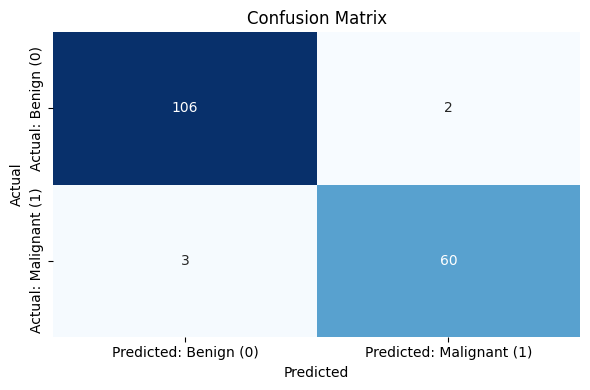


Classification Report:
                precision    recall  f1-score   support

   Benign (0)       0.97      0.98      0.98       108
Malignant (1)       0.97      0.95      0.96        63

     accuracy                           0.97       171
    macro avg       0.97      0.97      0.97       171
 weighted avg       0.97      0.97      0.97       171



In [31]:
#choosing a train model
knn = kNN(k=3, metric='manhattan')
knn.fit(X_train, y_train)

#predictions
yPred = knn.predict(X_test)

# 1. Accuracy
accuracy = accuracy_score(y_test, yPred)
print(f"Accuracy      : {accuracy:.4f}")

# 2. Precision
precision = precision_score(y_test, yPred)
print(f"Precision     : {precision:.4f}")

# 3. Recall
recall = recall_score(y_test, yPred)
print(f"Recall        : {recall:.4f}")

# 4. F1 Score
f1 = f1_score(y_test, yPred)
print(f"F1 Score      : {f1:.4f}")

# 5. Confusion Matrix
conf_matrix = confusion_matrix(y_test, yPred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=['Predicted: Benign (0)', 'Predicted: Malignant (1)'],
    yticklabels=['Actual: Benign (0)', 'Actual: Malignant (1)']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# 6. Classification Report
report = classification_report(y_test, yPred, target_names=['Benign (0)', 'Malignant (1)'])
print("\nClassification Report:\n", report)

## **Effect of k on Classification Accuracy**

- For each k from 3 to 29, fit your k‑NN on the training set and record test accuracy.

- Plot k (on the x‑axis) vs. accuracy (on the y‑axis), with markers and clear labels.

k=3, Accuracy=0.9708
k=4, Accuracy=0.9708
k=5, Accuracy=0.9708
k=6, Accuracy=0.9708
k=7, Accuracy=0.9708
k=8, Accuracy=0.9591
k=9, Accuracy=0.9649
k=10, Accuracy=0.9649
k=11, Accuracy=0.9649
k=12, Accuracy=0.9649
k=13, Accuracy=0.9649
k=14, Accuracy=0.9474
k=15, Accuracy=0.9532
k=16, Accuracy=0.9532
k=17, Accuracy=0.9532
k=18, Accuracy=0.9532
k=19, Accuracy=0.9532
k=20, Accuracy=0.9532
k=21, Accuracy=0.9532
k=22, Accuracy=0.9532
k=23, Accuracy=0.9532
k=24, Accuracy=0.9532
k=25, Accuracy=0.9532
k=26, Accuracy=0.9532
k=27, Accuracy=0.9532
k=28, Accuracy=0.9532
k=29, Accuracy=0.9532


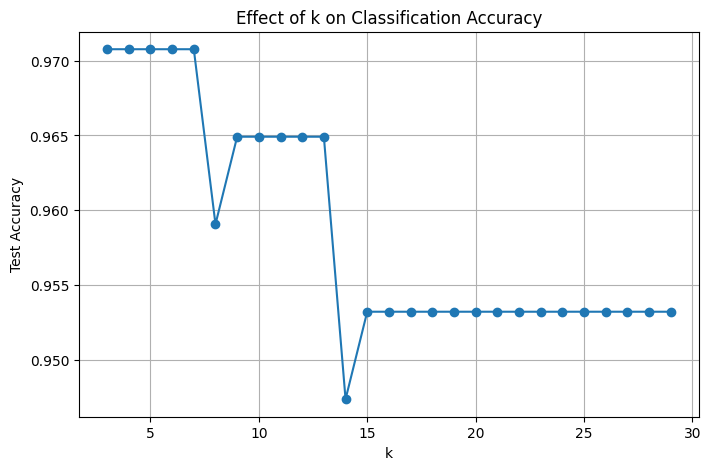

In [32]:
# Test different k values
k_values = range(3, 30)
accuracies = []

for k in k_values:
    knn = kNN(k=k, metric='manhattan')
    knn.fit(X_train, y_train)
    yPred = knn.predict(X_test)
    acc = accuracy_score(y_test, yPred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

# Plot k vs. accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.title('Effect of k on Classification Accuracy')
plt.grid(True)
plt.show()